First, let start with writing single particles functions that is the set of Hermite polynomial:


In [1]:
#### import necessary library
import numpy as np
from numpy.polynomial import hermite
from scipy.special import factorial, comb
from scipy.integrate import quad
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

from IPython.display import display, Latex
import copy

In [2]:
### helper function for matrix
def make_hermitian(matrix):
  """
  Converts a given square matrix into a Hermitian matrix.

  Args:
    matrix: An array representing a square matrix.

  Returns:
    A array representing the Hermitian version of the input matrix.
  """
  # Calculate the conjugate transpose (also known as Hermitian transpose)
  conjugate_transpose = matrix.conj().T
  
  # Calculate the Hermitian part: (A + A*)/2
  hermitian_matrix = (matrix + conjugate_transpose) / 2
  
  return hermitian_matrix

## Quantum harmonic oscillar basis and one-body integral

Given a non-interacting hamiltonian of $N$-particle harmonic oscillator system
$$
H = \frac{1}{2}\sum_{i=1}^N\Big({p^2_{i} +  x^2_i}\Big),
$$
for simplicity, we set $\hbar=m=\omega$=1. 

To perform second quantization we rewrite the one body term in terms of field operator as

$$
\mathcal{H} =\int\Psi^\dagger(x)H\Psi(x)dx
$$
The field operator can be written in terms of the harmonic oscillator basis (single particle function),

$$
\Psi^\dagger(x) = \sum_{i=0}^{\infty}\braket{x|\psi_i}^*a^\dagger_i= \sum_{i=0}^{\infty}\psi_i^*(x)a^\dagger_i
$$
and its h.c.

The harmonic oscillator eigenstates are known 
$$
\psi_n(x) = \frac{1}{\sqrt{2^nn!}}\Big(\frac{1}{\pi}\Big)^{1/4}\exp\Big({-\frac{x^2}{2}}\Big)H_n\Big(x\Big),
$$
where $n \geq 0$, and
$$
H_n(z)=(-1)^n {e^{z^2}}\frac{d^n}{dz^n}( e^{-z^2}),
$$
which is the (physicist Hermite polynomial function). 
Reference: wikipedia

In [3]:
### helper function for harmonic oscillator basis
def degree(n : int) -> int:
    """
        Degree to list of coefficient for Hermite polynomial.

    Args:
        n (int): The order of Hermite polynomial H_n.
    
    Returns:
        int: list of coefficient.
    e.g.,
    n=0 -> [1]
    n=1 -> [0,1]
    n=2 -> [0,0,1]
    """
    arr = []
    i = 0
    while i < n:
        arr.append(0)
        i += 1
    arr.append(1)
    return arr

def psi(x: float, n: int) -> float:
    """
    Harmonic oscillator wave function in position representation.

    Args:
        n (int): The order of eigenstate.
        x (float, array): The position.
    
    Returns:
        float: The wave function over position x.
    """
    N =  1./(np.sqrt(2**n*factorial(n))) * (1/np.pi)**(1/4) 
    return N * np.exp(-x**2/2) * hermite.hermval(x, degree(n)) 

def psi_k(k: float, n: int) -> float:
    """
    Harmonic oscillator wave function in momentum representation

    Args:
        n (int): The order of eigenstate.
        x (float, array): The position.
    
    Returns:
        float: The wave function over momentum k.
    """
    N =  1./(np.sqrt(2**n*factorial(n))) * (1/np.pi)**(1/4) 
    return N * np.exp(-k**2/2) * hermite.hermval(k, degree(n)) * (-1j)**n

def energy(n):
    return n+0.5

array([8.09327821e+12, 7.92893226e+12, 7.76757911e+12, ...,
       7.76757911e+12, 7.92893226e+12, 8.09327821e+12])

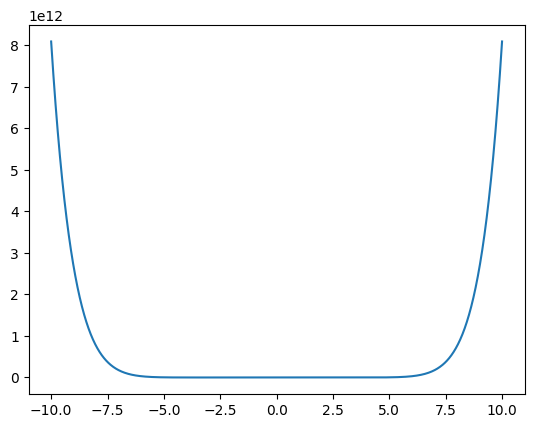

In [4]:
x = np.linspace(-10,10,2**10+1)
n = 10
plt.plot(x,hermite.hermval(x, degree(n)))
hermite.hermval(x, degree(n))

In [5]:
hermite.hermval(2, 0) 

np.float64(0.0)

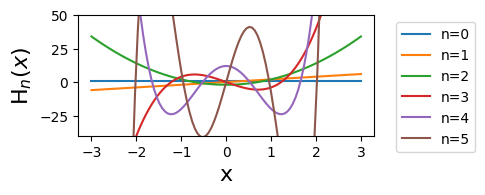

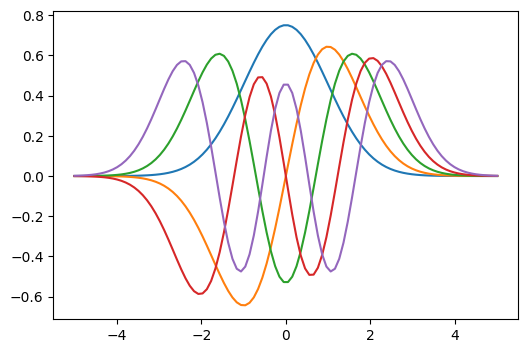

In [53]:
### hermite polynomial and the associate wave function over position representation

### hermite polynomial
n_example  = np.arange(0,6)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 2)) 
for i in n_example:
    x = np.linspace(-3, 3,100)
    plt.plot(x,hermite.hermval(x, degree(i)) , label=f'n={i}')

plt.ylim(-40,50)
plt.ylabel('$\mathrm{H}_n(x)$', size = 16)
plt.xlabel('x', size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### construct wave function over position representation
n_example  = np.arange(0,11)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4)) 
for i in n_example:
    x = np.linspace(-5, 5,100)
    plt.plot(x,psi(x=x,n=i)+energy(i), label=f'n={i}')
    plt.hlines(energy(i),x[0],x[-1],alpha=0.4, color='k')

plt.vlines(0,0,11,alpha=0.4, color='k')
plt.ylim(0,energy(n_example[-1]+1))
plt.ylabel('$\mathrm{\epsilon}_n$', size = 16)
plt.xlabel('x', size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Notice the even and odd correspond to the symmetric and antisymmetric, respectively.

In [7]:
### check normalized wave function 
### with quad function
p = lambda x,n: psi(x,n) * psi(x,n)
n = 0
integral_prob = quad(p, -np.inf, np.inf, args=(n))[0]
display(Latex(f'$\int_{{-\infty}}^{{\infty}} |\psi_{n}(x)|^2dx = {integral_prob:.3f}$'))

### finite-size approximation 
xi = -10; xf = 10; num_grid = 2**12+1
x = np.linspace(xi,xf,num_grid)
sum_prob = np.sum(psi(x=x, n=n) * psi(x=x, n=n) * (xf-xi)/num_grid)
display(Latex(f'$\sum_{{i=1}}^{{N_{{\mathrm{{grid}}}}}} |\psi_{n}(i)|^2\Delta x = {sum_prob:.3f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now, we have single particle function of harmonic oscillator basis. Expanding the field operators, we obtain
$$
\mathcal{H} =\sum_{ij}h_{ij}a^\dagger_ia_j,
$$
where
$$
h_{ij} = \int\psi_i^*(x)H\psi_j(x)dx.
$$

To compute $h_{ij}$
$$
h_{ij} = \frac{1}{2}\int\psi_i^*(x)p^2\psi_j(x)dx + \frac{1}{2}\int\psi_i^*(x)x^2\psi_j(x)dx,
$$

One way to compute the integrals we can write the first term in position representation as
$$
p^2\psi_n(x) = -\frac{\partial^2}{\partial x^2}\psi_n(x)=-\frac{1}{\sqrt{2^nn!}}\Big(\frac{1}{\pi}\Big)^{1/4}\exp\Big({-\frac{x^2}{2}}\Big)\Bigg(H_n''(x)-2xH'_n(x)+(x^2-1)H_n(x)\Bigg)
$$
and the second term is just the direct integral.

In [8]:
### momentum square psi function
def momentum_sqaure_psi(x,n):
    """
    Momentum square wave function in position representation

    Args:
        x (float, array): The position.
        n (int): The order of eigenstate.
    
    Returns:
        float: momentum squared time wave function.
    """
    N =  1./(np.sqrt(2**n*factorial(n))) * (1/np.pi)**(1/4)
    differentiated_1 = hermite.hermder(degree(n), m=1)
    differentiated_2 = hermite.hermder(degree(n), m=2)
    p2_psi = -N * np.exp(-x**2/2) * (hermite.hermval(x, differentiated_2) - 2*x*hermite.hermval(x, differentiated_1) + (x**2-1)*hermite.hermval(x, degree(n)))
    return p2_psi

In [9]:
### hij
psi_momentum_sqaure_psi = lambda x,n,m: psi(x,n) * momentum_sqaure_psi(x,m)
psi_position_sqaure_psi = lambda x,n,m: psi(x,n) * x**2 * psi(x,m)

def h_nm(n, m):
    h_p = quad(psi_momentum_sqaure_psi, -np.inf, np.inf, args=(n,m))[0]
    h_x = quad(psi_position_sqaure_psi, -np.inf, np.inf, args=(n,m))[0]
    return (h_p+h_x)/2

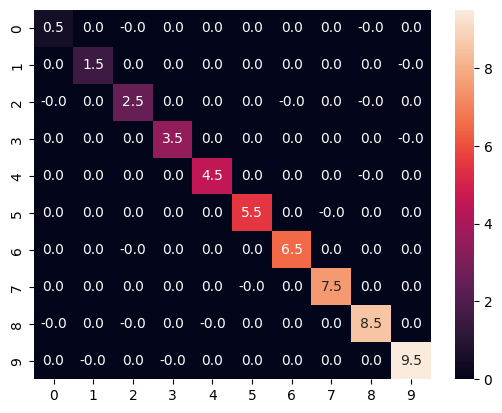

In [10]:
### one body integral
M = 10
hij = np.zeros((M,M))
#print("{:.3f}".format(h_nm(i,j))) 
for i in range(M):
    for j in range(i,M):
        hij[i][j] = h_nm(i,j)

hij = make_hermitian(np.array(hij))
# # Create a figure and an Axes object
# fig, ax = plt.subplots()
# im = plt.imshow(hij, cmap='viridis', aspect='auto')
# #ax.invert_xaxis()
# plt.colorbar(im, ax=ax)
# plt.show()
sns.heatmap(hij, annot=True, fmt=".1f")
plt.show()

Sanity check: we dont have have to compute the one body integral, as we can simply take the known harmonic basis which is the eigenbasis of the non-interacting Hamiltonian.

## Fock basis via maximum energy truncation algorithm

Reference: [1] https://arxiv.org/pdf/1803.08387 and [2] https://arxiv.org/pdf/1908.02084

We know the single-particle (quantum harmonic oscillator basis): eigenstates $\psi_i(x)$ and eigenenergies $\epsilon_k$, we can consider amany-body Hilbert space of $N$ particles as it is spanned by Fock states build from these single-partilce orbitals.

$$
\ket{i} = \ket{n_0n_1\dots},
$$

with $\sum_kn_k=N$. The energy of this state is then $E_i=\sum_kn_k\epsilon_k$. Because of numerical limitations, in the standard approach, one cuts-off a size of the single-particle basis on large but finite $\mathcal{C}$. To increase the numerical accuracy of the many-body diuagonalization, we can increases the cut-off $\mathcal{C}$: $\ket{i} = \ket{n_0n_1\dots n_{\mathcal{C}}},
$

However, the number of Fock states (Hilbert space) grows exponentially:
$$
\mathcal{D}_c = \frac{(\mathcal{C}+N)!}{\mathcal{C}!N!},
$$
We make a note that this is computed by stars and bars counts where the number of bars (C) = bins (number of orbital)-1 to chose N things out of C+N things. Similary for fermion where we simple choose N things from C+1 (bins) things.

As we can see, this method is naturally limited by numerical resources (memory and computation time)\dots. Moreover, this construction can lead to inaccurate results since it does not take into account different many-body states having the same energy on equal footing, i.e there is lower energy eigenstate beyond $\ket{00 \dots N}$ e.g., $\ket{N0 \dots 01}$. So this hard cut-off could lead to inaccurate result. As argue in [1], the accuracy of the ED with extending numerical efforts, one should select Fock states with the lowest non-interacting energy rather that the lowest excitation in the Fock basis. 

Follow [2], a fast and simple algorithm for generating the many-body Fock basis build from many-body Fock state having the lowest non-interacting energies. 

Typically, selecting the Fock bais states that possess the lowest non-interacting energy is not a trivial task. It can be done easily in the harmonic trap case since each can be represented uniquely by integer


In [11]:
# t = np.array([[0,1,2],[3,4,5]])
# np.max(t)

In [12]:
### transform set of basis
def list_to_fock(x):
    """
    List of list of eigenstate  in the first quantization to the second quantization, e.g., N=4: [0,1,1,1] (read as the first particle in the n=0 state and others particles in the n=1 state -> [1,3] in fock basis

    Args:
        x (list of list ): i.e., [[],[],[]]
    
    Returns:
        list: corresponding fockbasis
    """

    fock_list = []
    x = np.array(x)
    N = np.max(x)+1

    for i in range(len(x)):
        fock = []
        for j in range(N):
            fock.append(np.count_nonzero(x[i]==j))
        fock_list.append(fock)
    return fock_list

def fock_to_energy(x):
    """
    List of list of fockbasis to corresponding energy

    Args:
        x (list of list ): i.e., [[],[],[]]
    
    Returns:
        list: corresponding energies
    """
    E_list = []
    x = np.array(x)
    N = len(x[0])

    for i in range(len(x)):
        E_ = 0
        for j in range(N):
            E_ += x[i][j] * E(j)
        E_list.append(E_)

    return E_list

def E(k):
    e = 0.5
    i = 0
    ### harmonic
    while i < k:
        e += 1
        i += 1
    ### anharmonic
    # while i < k:
    #     e += (4./5) ** i
    #     i += 1
    return e

In [13]:
# #list_basis
# N = 4
# EnergyMax = 10
# state = [0]*N
# Index = N-1
# list_basis = []
# list_basis.append(list(state))


# #generate bosonic fock basis via cut-off maximum energy
# while Index >= 0:
#     state[Index] = state[Index] + 1
#     for i in range(Index, N):
#         state[i] = state[Index]
    
#     Energy = 0
#     for j in range(0,N):
#         Energy += E(state[j])

#     if Energy <= EnergyMax:
#         list_basis.append(list(state))
#         Index = N-1
#     else:
#         Index-=1


In [14]:
# #fock_basis
# fock_basis = list_to_fock(list_basis)
# #energy
# energy = fock_to_energy(fock_basis)

In [15]:
### now define the act of operator
def a(i: int, fock_basis):
    if fock_basis[i] < 0:
        ein_val = 0
    else:
        ein_val = np.sqrt(fock_basis[i])
    fock_basis[i] = fock_basis[i]-1
    return [ein_val, fock_basis]

def ad(i: int, fock_basis):
    if fock_basis[i]+1 < 0:
        ein_val = 0
    else:
        ein_val = np.sqrt(fock_basis[i]+1)
    fock_basis[i] = fock_basis[i]+1
    return [ein_val, fock_basis]

def num_op(i: int, fock_basis):
    ein_val = fock_basis[i]
    return [ein_val, fock_basis]

# x = list(fock_basis[0])
# print(x)
# print(a(0,x))

# x = list(fock_basis[0])
# print(ad(0,x))

In [16]:
# Compute eigenvalues and eigenvectors
# eigenvalues, eigenvectors = la.eig(hij)

#E = np.sort(eigenvalues)
# Create the diagonal matrix D from eigenvalues
#D = np.diag(E).real

# sns.heatmap(D, annot=True, fmt=".1f")
# plt.show()

In [17]:
#list_basis
N = 3
EnergyMax = 7
state = [0]*N
Index = N-1
list_basis = []
list_basis.append(list(state))


#generate bosonic fock basis via cut-off maximum energy
while Index >= 0:
    state[Index] = state[Index] + 1
    for i in range(Index, N):
        state[i] = state[Index]
    
    Energy = 0
    for j in range(0,N):
        Energy += E(state[j])

    if Energy <= EnergyMax:
        list_basis.append(list(state))
        Index = N-1
    else:
        Index-=1


In [18]:
F = list_to_fock(list_basis)
np.shape(F)
list_basis, len(list_basis), F, len(F)

([[0, 0, 0],
  [0, 0, 1],
  [0, 0, 2],
  [0, 0, 3],
  [0, 0, 4],
  [0, 0, 5],
  [0, 1, 1],
  [0, 1, 2],
  [0, 1, 3],
  [0, 1, 4],
  [0, 2, 2],
  [0, 2, 3],
  [1, 1, 1],
  [1, 1, 2],
  [1, 1, 3],
  [1, 2, 2]],
 16,
 [[3, 0, 0, 0, 0, 0],
  [2, 1, 0, 0, 0, 0],
  [2, 0, 1, 0, 0, 0],
  [2, 0, 0, 1, 0, 0],
  [2, 0, 0, 0, 1, 0],
  [2, 0, 0, 0, 0, 1],
  [1, 2, 0, 0, 0, 0],
  [1, 1, 1, 0, 0, 0],
  [1, 1, 0, 1, 0, 0],
  [1, 1, 0, 0, 1, 0],
  [1, 0, 2, 0, 0, 0],
  [1, 0, 1, 1, 0, 0],
  [0, 3, 0, 0, 0, 0],
  [0, 2, 1, 0, 0, 0],
  [0, 2, 0, 1, 0, 0],
  [0, 1, 2, 0, 0, 0]],
 16)

In [19]:
### first we diagonalize H_0 using Harmonic basis to obtain non-interacting energy
psi_momentum_sqaure_psi = lambda x,n,m: psi(x,n) * momentum_sqaure_psi(x,m)
psi_position_sqaure_psi = lambda x,n,m: psi(x,n) * x**2 * psi(x,m)

def h_nm(n, m):
    h_p = quad(psi_momentum_sqaure_psi, -np.inf, np.inf, args=(n,m))[0]
    h_x = quad(psi_position_sqaure_psi, -np.inf, np.inf, args=(n,m))[0]
    return (h_p+h_x)/2

### check correct energy
M = len(F[0])
hij = np.zeros((M,M))
#print("{:.3f}".format(h_nm(i,j))) 
for i in range(M):
    for j in range(i,M):
        h = h_nm(i,j)
        if h<1e-10:
            hij[i][j] = 0
        else:
         hij[i][j] = h

hij = make_hermitian(np.array(hij))
# # Create a figure and an Axes object
# fig, ax = plt.subplots()
# im = plt.imshow(hij, cmap='viridis', aspect='auto')
# #ax.invert_xaxis()
# plt.colorbar(im, ax=ax)
# plt.show()
# sns.heatmap(hij, annot=True, fmt=".1f")
# plt.show()

In [20]:
nonzero_ind = np.transpose(np.nonzero(hij))
nonzero_ind

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [21]:
# hij[nonzero_ind[0][0],nonzero_ind[0][0]]

In [22]:
hij

array([[0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 1.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 2.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 3.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 4.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 5.5]])

In [23]:
### write in fock basis
H = np.zeros((len(F),len(F)))
for k in range(len(F)):
    e_list = []
    for i in nonzero_ind:
        ein_a, F[k] = a(i[0], F[k])
        ein_ad, F[k]= ad(i[1], F[k])
        element = hij[i[0],i[1]] *  ein_ad * ein_a
        
        if F[k] in F:
            ind = F.index(F[k])
            H[ind,k] += element 
H = make_hermitian(H)

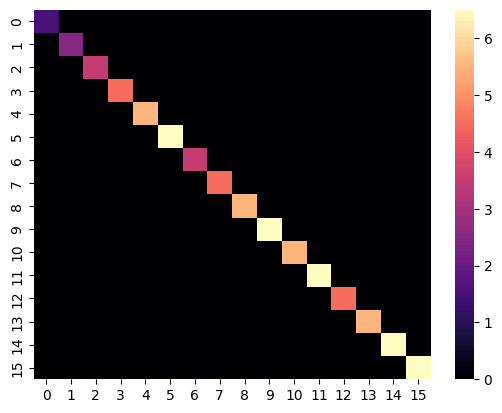

In [24]:
sns.heatmap(H, cmap='magma')
plt.show()

In [25]:
eigenvalues, eigenvectors = la.eig(H)
EG, G = [eigenvalues[0].real, eigenvectors[0]]
EG, G

(np.float64(1.4999999999999998),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [26]:
### one-body RDM
# allocate u vectors
D = len(F)
M = len(F[0])
u = np.zeros((M,D), complex)

# build u_n = a_n |Psi>
for beta in range(D):
    coeff = G[beta]
    if coeff == 0: continue
    occ = F[beta]  # array length M
    for n in range(M):
        nocc = occ[n]
        if nocc == 0: continue
        u[n,beta] += np.sqrt(nocc) * coeff

In [27]:
def index_of_state(occ,n, aF):
    aF = copy.deepcopy(F)
    for i in aF:
        i[n]-=1
    occ[n] = occ[n]-1
    return aF.index(occ)
# allocate u vectors
u = np.zeros((M, D), complex)

# build u_n = a_n |Psi>
for beta in range(D):
    coeff = G[beta] # array length M
    for n in range(M):
        occ = copy.deepcopy(F[beta]) 
        nocc = occ[n]
        if nocc == 0: continue
        alpha = index_of_state(occ, n, F)   # fast lookup via dict
        u[n, alpha] += np.sqrt(nocc) * coeff

In [28]:
# assemble rho
rho = np.zeros((M,M), complex)
for m in range(M):
    for n in range(M):
        rho[m,n] = np.dot(np.conjugate(u[m,:]), u[n,:])   # inner product over D
tol=1e-6
# check trace
assert abs(np.trace(rho) - N) < tol

In [29]:
xgrid = np.linspace(-4,4,1000)
def rho_xx(xgrid):
    # coordinate density on grid x:
    rho_xx = []
   
    for xi in xgrid:
        phi_vec = np.array([ psi(xi,m) for m in range(M) ])
        rho_x = phi_vec.conj().T @ rho @ phi_vec
        rho_xx.append(rho_x)
    return rho_xx

/Users/wirawatkokaew/Library/CloudStorage/OneDrive-OIST/Desktop/Research_Project/BP/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/wirawatkokaew/Library/CloudStorage/OneDrive-OIST/Desktop/Research_Project/BP/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


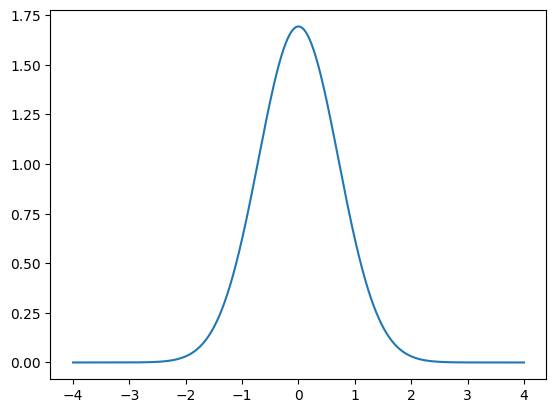

In [30]:
plt.plot(xgrid,rho_xx(xgrid))


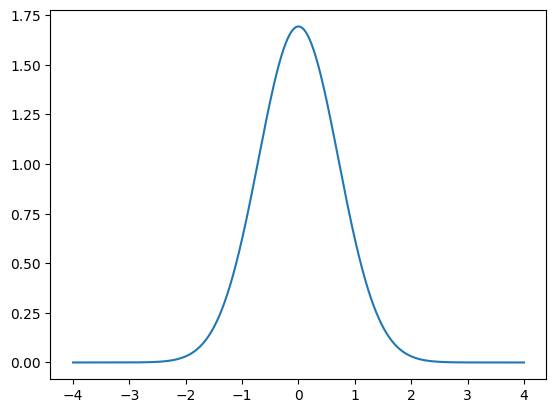

In [31]:
def n_k(k, rho):
    val = 0
    for m in range(rho.shape[0]):
        for n in range(rho.shape[1]):
            val += np.conj(psi_k(k, m)) * psi_k(k, n) * rho[m,n]
    return np.real(val)
k = np.linspace(-4,4,1000)
plt.plot(k,n_k(k,rho))

In [32]:
quad(n_k, -np.inf, np.inf, args=rho)[0]

2.999999999999999

## Two-body integral

With twobody-contact interaction
$$
H_0 = \sum_{i=1}^2\frac{1}{2}\Big({p_i^2 +  x_i^{1.5}}\Big)
$$
with 
$$
H_{\mathrm{int}}=g\sum_{i>j}\delta(x_i-x_j),
$$
It can be written in the second quantization form as
$$
U_{ijkl} = g\int dx \psi_i(x)\psi_j(x)\psi_k(x)\psi_l(x)
$$
Notice that because $\psi_n(x)$ has parity $(-1)^n$, the integrand is odd if there is no pair of odd: $i+j+k+l$ is odd. Therefore,
$$
U_{ijkl} = 0 \mathrm{~if~} i+j+k+l \mathrm{~is~odd}
$$

In [33]:
### for example U0110 and U1110
psi_4 = lambda x,i,j,k,l: psi(x,i) * psi(x,j) * psi(x,k) * psi(x,l)

[i,j,k,l] = [0,1,1,0]

U_ijkl = quad(psi_4, -np.inf, np.inf, args=(i,j,k,l))[0]
display(Latex(f'$U{[i,j,k,l]} = {U_ijkl:.3f}$'))

[i,j,k,l] = [1,1,1,0]

U_ijkl = quad(psi_4, -np.inf, np.inf, args=(i,j,k,l))[0]
display(Latex(f'$U{[i,j,k,l]} = {U_ijkl:.3f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Other symmetry of the two-body integral can also be used: 

In [34]:
### with H_int
u_func = lambda x,i,j,k,l: psi(x,i) * psi(x,j) * psi(x,k) * psi(x,l)

def Uijkl(i,j,k,l):
    r = quad(u_func, -np.inf, np.inf, args=(i,j,k,l))[0]
    return r

U = np.zeros((M,M,M,M))
for i in range(M):
    for j in range(M):
        for k in range(M):
            for l in range(M):
                if np.mod(i+j+k+l,2) == 1:
                    continue
                elif U[i,j,k,l]!=0:
                    continue
                else:
                    U[i,j,k,l] = Uijkl(i,j,k,l)
                    U[j,i,k,l] = U[i,j,k,l]
                    U[i,j,l,k] = U[i,j,k,l]
                    U[j,i,l,k] = U[i,j,k,l]
                    U[k,l,i,j] = U[i,j,k,l]

g = 5
U = g/2 * np.array(U)

In [35]:
int = np.zeros((len(F),len(F)))
nonzero_ind = np.transpose(np.nonzero(U))
Hint = np.zeros((len(F),len(F)))
for k in range(len(F)):
    e_list = []
    for i in nonzero_ind:
        Fs = copy.deepcopy(F[k])
        print('b', Fs)
        ein_al, Fs = a(i[3], Fs)
        ein_ak, Fs = a(i[2], Fs)
        ein_adj, Fs= ad(i[1], Fs)
        ein_adi, Fs= ad(i[0], Fs)
        #print(U[i[0],i[1],i[2],i[3]])
        element = U[i[0],i[1],i[2],i[3]] *  ein_adi * ein_adj * ein_ak * ein_al
        print('a', Fs, i, element)
        if Fs in F:
            print('p', Fs)
            ind = F.index(Fs)
            Hint[ind,k] += element 

#Hint = make_hermitian(Hint)

b [3, 0, 0, 0, 0, 0]
a [3, 0, 0, 0, 0, 0] [0 0 0 0] 5.984134206021498
p [3, 0, 0, 0, 0, 0]
b [3, 0, 0, 0, 0, 0]
a [4, 0, -1, 0, 0, 0] [0 0 0 2] -0.0
b [3, 0, 0, 0, 0, 0]
a [4, 0, 0, 0, -1, 0] [0 0 0 4] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, -2, 0, 0, 0, 0] [0 0 1 1] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, -1, 0, -1, 0, 0] [0 0 1 3] -0.0
b [3, 0, 0, 0, 0, 0]
a [5, -1, 0, 0, 0, -1] [0 0 1 5] 0.0
b [3, 0, 0, 0, 0, 0]
a [4, 0, -1, 0, 0, 0] [0 0 2 0] -0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, -2, 0, 0, 0] [0 0 2 2] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, -1, 0, -1, 0] [0 0 2 4] -0.0
b [3, 0, 0, 0, 0, 0]
a [5, -1, 0, -1, 0, 0] [0 0 3 1] -0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, 0, -2, 0, 0] [0 0 3 3] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, 0, -1, 0, -1] [0 0 3 5] -0.0
b [3, 0, 0, 0, 0, 0]
a [4, 0, 0, 0, -1, 0] [0 0 4 0] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, -1, 0, -1, 0] [0 0 4 2] -0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, 0, 0, -2, 0] [0 0 4 4] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, -1, 0, 0, 0, -1] [0 0 5 1] 0.0
b [3, 0, 0, 0, 0, 0]
a [5, 0, 0, -1, 0, 

In [36]:
nonzero_ind

array([[0, 0, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 0, 4],
       ...,
       [5, 5, 5, 1],
       [5, 5, 5, 3],
       [5, 5, 5, 5]])

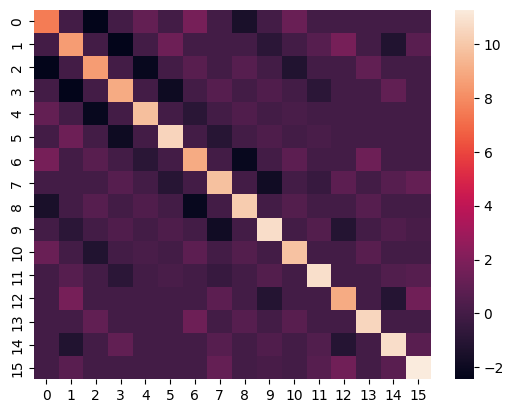

In [37]:
### full hamiltonian element of 
sns.heatmap(H+Hint)#, cmap='jet', annot=True)
plt.show()


In [38]:
H+Hint

array([[ 7.48413421,  0.        , -2.44301256,  0.        ,  1.05785547,
         0.        ,  1.72747075,  0.        , -1.49603355,  0.        ,
         1.29560306,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  8.48413421,  0.        , -2.44301256,  0.        ,
         1.36568554,  0.        ,  0.        ,  0.        , -0.86373537,
         0.        ,  0.61075314,  1.72747075,  0.        , -1.22150628,
         0.74801678],
       [-2.44301256,  0.        ,  8.48677851,  0.        , -2.15933843,
         0.        ,  0.70523698,  0.        ,  0.61075314,  0.        ,
        -1.23416471,  0.        ,  0.        ,  0.9973557 ,  0.        ,
         0.        ],
       [ 0.        , -2.44301256,  0.        ,  8.98810065,  0.        ,
        -1.95138575,  0.        ,  0.61075314,  0.        ,  0.44077311,
         0.        , -0.87268624,  0.        ,  0.        ,  0.9973557 ,
         0.        ],
       [ 1.05785547,  0.        , -2

In [39]:
eigenvalues, eigenvectors = la.eig(H+Hint)
idx = eigenvalues.argsort()
eigenValues = eigenvalues[idx]
eigenVectors = eigenvectors[:, idx]
EG, G = [eigenValues[0], eigenVectors[0]]
EG, G

(np.complex128(4.727997149111195+0j),
 array([ 7.17508212e-01, -1.41083802e-15,  4.65912498e-01, -2.32331550e-12,
         7.87071031e-17, -2.62072172e-17,  4.37541674e-17,  2.40937383e-13,
         8.08208999e-18, -8.77480711e-18, -1.39280447e-13, -4.53497688e-18,
        -5.33072734e-14, -5.17790991e-01, -5.22738844e-17, -7.71951478e-16]))

In [40]:
eigenValues

array([ 4.72799715+0.j,  5.72799715+0.j,  6.52399344+0.j,  6.73345843+0.j,
        7.52399344+0.j,  7.73345843+0.j,  7.83706111+0.j,  9.24008388+0.j,
       10.24008388+0.j, 10.40935141+0.j, 11.48413421+0.j, 12.48413421+0.j,
       12.73877643+0.j, 13.55383024+0.j, 13.73877643+0.j, 14.55383024+0.j])

<Axes: >

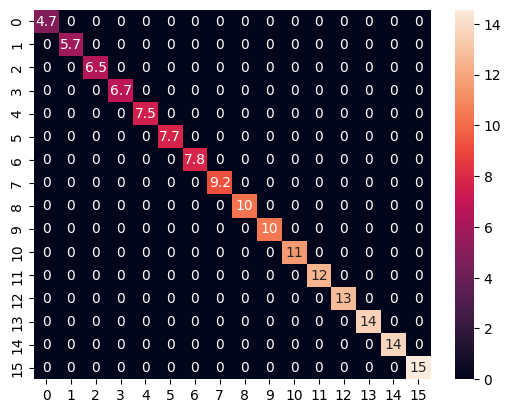

In [41]:
sns.heatmap(eigenValues.real*np.eye(len(eigenValues)),annot=True)

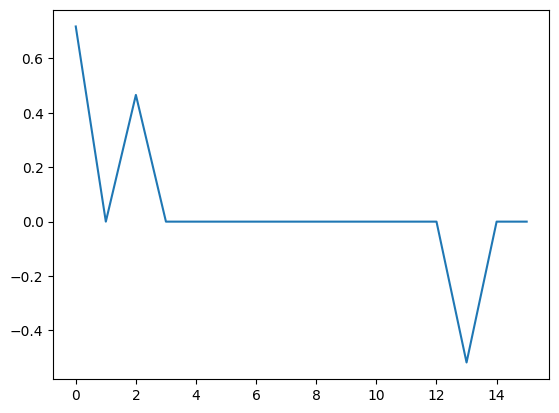

In [42]:
plt.plot(G)

In [43]:
eigenValues

array([ 4.72799715+0.j,  5.72799715+0.j,  6.52399344+0.j,  6.73345843+0.j,
        7.52399344+0.j,  7.73345843+0.j,  7.83706111+0.j,  9.24008388+0.j,
       10.24008388+0.j, 10.40935141+0.j, 11.48413421+0.j, 12.48413421+0.j,
       12.73877643+0.j, 13.55383024+0.j, 13.73877643+0.j, 14.55383024+0.j])

In [44]:
### one-body RDM
# allocate u vectors
D = len(F)
M = len(F[0])
u = np.zeros((M,D), complex)

# build u_n = a_n |Psi>
for beta in range(D):
    coeff = G[beta]
    if coeff == 0: continue
    occ = F[beta]  # array length M
    for n in range(M):
        nocc = occ[n]
        if nocc == 0: continue
        u[n,beta] += np.sqrt(nocc) * coeff

In [45]:
def index_of_state(occ, n, F):
    aF = copy.deepcopy(F)
    for i in aF:
        i[n]-=1
    occ[n] = occ[n]-1
    return aF.index(occ)
# allocate u vectors
u = np.zeros((M, D), complex)

# build u_n = a_n |Psi>
for beta in range(D):
    coeff = G[beta] # array length M
    for n in range(M):
        occ = copy.deepcopy(F[beta]) 
        nocc = occ[n]
        if nocc == 0: continue
        alpha = index_of_state(occ, n, F)   # fast lookup via dict
        u[n, alpha] += np.sqrt(nocc) * coeff

In [46]:
# assemble rho
rho = np.zeros((M,M), complex)
for m in range(M):
    for n in range(M):
        rho[m,n] = np.dot(np.conjugate(u[m,:]), u[n,:])   # inner product over D
tol=1e-10
# check trace
assert abs(np.trace(rho) - N) < tol

In [47]:
# coordinate density on grid x:
rho_xx = []
xgrid = np.linspace(-4,4,1000)
for xi in xgrid:
    phi_vec = np.array([ psi(xi,m) for m in range(M) ])
    rho_x = phi_vec.conj().T @ rho @ phi_vec
    rho_xx.append(rho_x)

/Users/wirawatkokaew/Library/CloudStorage/OneDrive-OIST/Desktop/Research_Project/BP/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/wirawatkokaew/Library/CloudStorage/OneDrive-OIST/Desktop/Research_Project/BP/.venv/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


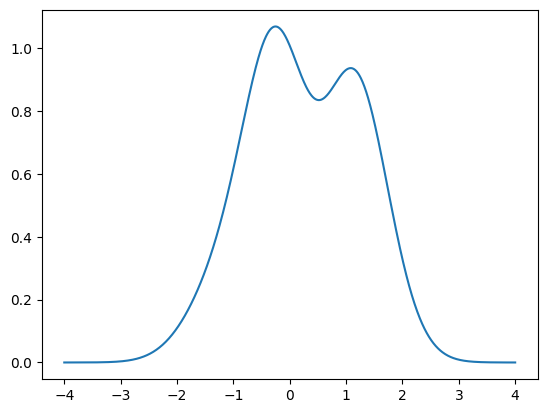

In [48]:
plt.plot(xgrid,rho_xx)